# PyTorch Commands for Deep Learning with MNIST Dataset

# July 21, 2022

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Simple Math with torch

In [66]:
#Pixel operations. (5x2, 3x1)
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print (x*y)

tensor([10.,  3.])


In [67]:
#fill with zeros. Two rows and each rown has five columns 
z = torch.zeros([2,5])
print (z)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [69]:
#view method
a = torch.rand([2,5])
a

tensor([[0.6278, 0.8631, 0.1801, 0.0634, 0.6462],
        [0.9781, 0.7107, 0.3648, 0.2198, 0.8599]])

In [70]:
#reshape the tensor as one-dimensional array
b = a.view([1,10])
b

tensor([[0.6278, 0.8631, 0.1801, 0.0634, 0.6462, 0.9781, 0.7107, 0.3648, 0.2198,
         0.8599]])

# Data Visualization

In [71]:
#Collect Data, divide into training and testing data
train = datasets.MNIST("", train=True, download=True,
                           transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                           transform=transforms.Compose([transforms.ToTensor()]))


In [72]:
#setup train and test dataset
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [73]:
#check the training data. Lets see first few elements
for data in trainset:
    #print (data)
    break

#Notice that the data is for 9 digits with each digit represented by a tensor

In [74]:
#Lets pick data elements and see what they contain
#Remember images have two coordinates, two indices in array/tensor
X, y = data[0][0], data[1][0]
print (y)

tensor(0)


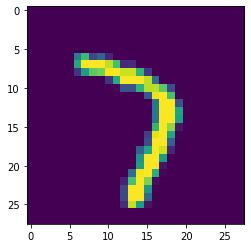

In [75]:
#visualize the image in data array
plt.imshow(data[0][1].view(28,28))

# Sample size per digit

In [76]:
#setup a counter dictionary. Each digit has its counter
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total_iter = 0
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total_iter += 1
print (counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


# Are all digits treated fairly by the model?

In [77]:
for i in counter_dict:
    print (f" {i}: {((counter_dict[i]/total_iter)*100)}")

 0: 9.871666666666666
 1: 11.236666666666666
 2: 9.93
 3: 10.218333333333334
 4: 9.736666666666666
 5: 9.035
 6: 9.863333333333333
 7: 10.441666666666666
 8: 9.751666666666667
 9: 9.915000000000001


# Let's Build a Neural Network

In [78]:
#OOP and Functions for NN
import torch.nn as nn
import torch.nn.functional as F

In [79]:
#Define a class Net
class NNDigits(nn.Module):
    def __init__ (self):
        super().__init__()
        #Let's build a fully connected (fc) Neural Network
        #Linear transformation takes size of input and output samples
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        #output size is 10: one for each digit
        
    def forward(self, X):
        #Rectified Linear activation function. For neuron firing
        #ReLu is a sigmoid function with data interval [0,1]
        X = F.relu(self.fc1(X))
        #Hidden Network 
        X = F.relu(self.fc2(X))
        X = self.fc4(X)
        #softmax turns an array/vector of real values into 
        #an array/vector of real values that sum to 1
        return F.log_softmax(X, dim=1)

nn_digits = NNDigits()
print (nn_digits)
        

NNDigits(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


# Setup Data for the Model (Validation)

In [80]:
Z = torch.rand((28,28))
#since we dont know the shape of the model, we prefix with 1 or -1
Z = Z.view(-1,28*28)
output = nn_digits(Z)
#Lets get the predicted values 
#output 

# Optimize the Model to quanitfy loss

In [81]:
import torch.optim as optim
optimizer = optim.Adam(nn_digits.parameters(),lr=0.01 )
#learning rate. Make sure the model not occilate 
#calculate (iteratively) loss: model output - target output 
EPOCHS = 3 #model iterations 
for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of features and labels (10 features, 10 targets)
        X, y = data
        #zero the gradient for each batch
        #gradients limit the loss
        nn_digits.zero_grad()
        #pass the data through the network
        output = nn_digits(X.view(-1,28*28))
        #Loss. How wrong were we? 
        loss = F.nll_loss(output, y)
        print (loss)
        #reiterate for better model using backward()
        #across all parameters 
        loss.backward()
        optimizer.step()
    print(loss)

tensor(2.3265, grad_fn=<NllLossBackward0>)
tensor(2.3214, grad_fn=<NllLossBackward0>)
tensor(2.3389, grad_fn=<NllLossBackward0>)
tensor(2.2175, grad_fn=<NllLossBackward0>)
tensor(2.2877, grad_fn=<NllLossBackward0>)
tensor(2.3081, grad_fn=<NllLossBackward0>)
tensor(2.1976, grad_fn=<NllLossBackward0>)
tensor(2.0972, grad_fn=<NllLossBackward0>)
tensor(2.1637, grad_fn=<NllLossBackward0>)
tensor(1.9791, grad_fn=<NllLossBackward0>)
tensor(1.7646, grad_fn=<NllLossBackward0>)
tensor(1.9308, grad_fn=<NllLossBackward0>)
tensor(2.1751, grad_fn=<NllLossBackward0>)
tensor(1.9630, grad_fn=<NllLossBackward0>)
tensor(1.9409, grad_fn=<NllLossBackward0>)
tensor(1.9516, grad_fn=<NllLossBackward0>)
tensor(1.3317, grad_fn=<NllLossBackward0>)
tensor(1.4174, grad_fn=<NllLossBackward0>)
tensor(1.9225, grad_fn=<NllLossBackward0>)
tensor(1.2438, grad_fn=<NllLossBackward0>)
tensor(1.9345, grad_fn=<NllLossBackward0>)
tensor(1.7396, grad_fn=<NllLossBackward0>)
tensor(1.7316, grad_fn=<NllLossBackward0>)
tensor(1.58

# How Correct were We?

In [82]:
correct = 0
total = 0
#calculate model without gradients
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = nn_digits(X.view(-1,28*28))
        for idx, i in enumerate (output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print ("Accuracy: ", round(correct/total, 3))

Accuracy:  0.954


# Let's Check Final Results 

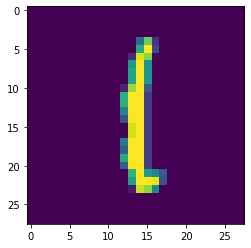

In [90]:
plt.imshow(X[0].view(28,28))
plt.show()

In [84]:
print (torch.argmax(nn_digits(X[0].view(-1,28*28))[0]))

tensor(1)


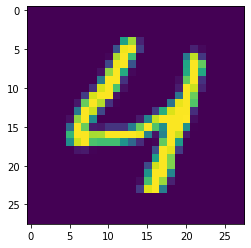

In [91]:
plt.imshow(X[1].view(28,28))
plt.show()

In [92]:
print (torch.argmax(nn_digits(X[1].view(-1,28*28))[0]))

tensor(4)


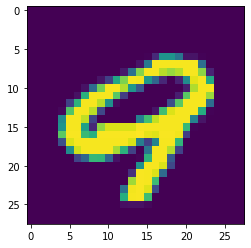

In [87]:
plt.imshow(X[2].view(28,28))
plt.show()

In [93]:
print (torch.argmax(nn_digits(X[2].view(-1,28*28))[0]))

tensor(9)


# End of the Program. Hope you Enjoyed it! 